# Machine learning models to predict survivability of ICU Patients with Severe Sepsis Shock

Although U.S. hospitals pay out over $22.2 billion annually for sepsis treatment, the disease still causes 20-45 percent of death in hospitals. By the time the physical manifestations of sepsis start to appear, it’s sometimes too late to help the patient. Somewhere, buried in the data – in the blood values, the blood-pressure values, the heart rate, the temperature – is a prediction that this patient is heading toward an overwhelming infection and is likely to die. If we could predict that very early, it will make it less likely the patient would die.


A predictive model that determines which patients are most vulnerable can really help ICUs focus their Physicians and staff on the most vulnerable patients. Potentially, such selective treatment can reduce mortality without increasing spending. Through this Notebook, a machine learning model is being designed to predict death within 30 days of ICU admission for the patients who have been diagnosed with Sepsis/septic shock.

In the previous Notebook, we analyzed the data and built the feature set that can be used as input to Machine learning models. In this Notebook, we will go ahead and build the machine learning models using those feature sets.

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import datetime
from time import time

import seaborn as sns
sns.set(style='ticks')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Import supplementary visualization code visuals.py
import visuals as vs

## Extracting the features from CSV to a Panda dataframe

In [2]:
sepsis_features = pd.read_csv('Final_sepsis_feature_list.csv')

In [3]:
sepsis_features.columns

Index([u'Unnamed: 0', u'subject_id', u'hadm_id',
       u'Alanine Aminotransferase (ALT)', u'Alkaline Phosphatase',
       u'Anion Gap', u'Asparate Aminotransferase (AST)', u'Basophils',
       u'Bicarbonate', u'Bilirubin, Total', u'Calcium, Total', u'Chloride',
       u'Creatinine', u'Eosinophils', u'Glucose', u'Hematocrit', u'Hemoglobin',
       u'INR(PT)', u'Lactate', u'Lymphocytes', u'MCH', u'MCHC', u'MCV',
       u'Magnesium', u'Monocytes', u'Neutrophils', u'PT', u'PTT', u'Phosphate',
       u'Platelet Count', u'Potassium', u'RDW', u'Red Blood Cells', u'Sodium',
       u'Specific Gravity', u'Urea Nitrogen', u'White Blood Cells', u'pH',
       u'admission_type', u'insurance', u'ethnicity', u'death_within_30_days',
       u'gender', u'age', u'BLOOD CULTURE', u'MRSA SCREEN', u'SPUTUM',
       u'STOOL', u'SWAB', u'URINE', u'num_of_infections'],
      dtype='object')

In [4]:
sepsis_features.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
sepsis_features.head()

,subject_id,hadm_id,Alanine Aminotransferase (ALT),Alkaline Phosphatase,Anion Gap,Asparate Aminotransferase (AST),Basophils,Bicarbonate,"Bilirubin, Total","Calcium, Total",...,death_within_30_days,gender,age,BLOOD CULTURE,MRSA SCREEN,SPUTUM,STOOL,SWAB,URINE,num_of_infections
0,21,111970,47.000000,167.000000,17.0,82.000000,0.00,23.50,0.300000,7.700000,...,1,M,87,1,0,0,1,0,0,2
1,94,183686,90.333333,68.666667,14.0,82.333333,0.85,23.25,1.033333,8.075000,...,0,M,74,0,0,0,0,0,0,0
2,157,107880,13.000000,118.000000,17.4,25.000000,0.00,18.00,0.600000,7.940000,...,0,M,80,0,0,0,0,0,2,3
3,166,128219,94.822544,141.192150,19.0,148.710368,0.00,24.00,1.501629,7.903004,...,1,F,91,1,0,0,0,0,0,1
4,188,191517,121.000000,130.000000,15.0,114.000000,0.00,17.00,1.775000,7.725000,...,0,M,51,0,0,0,0,0,0,0


In [6]:
sepsis_features.shape

(1178, 50)

### Analyzing the co-relation and importance of all features together

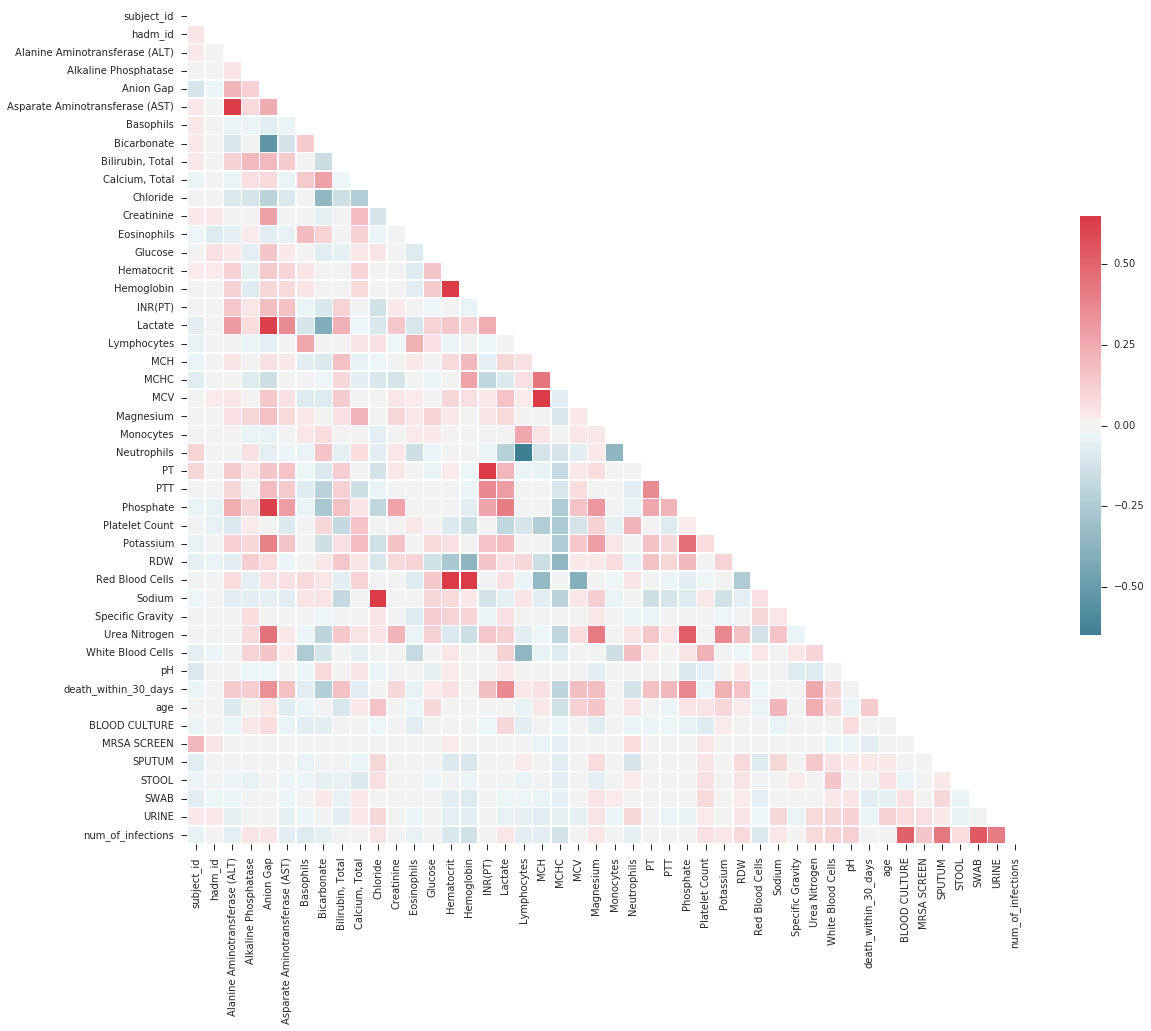

In [7]:
# Compute the correlation matrix
corr = sepsis_features.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

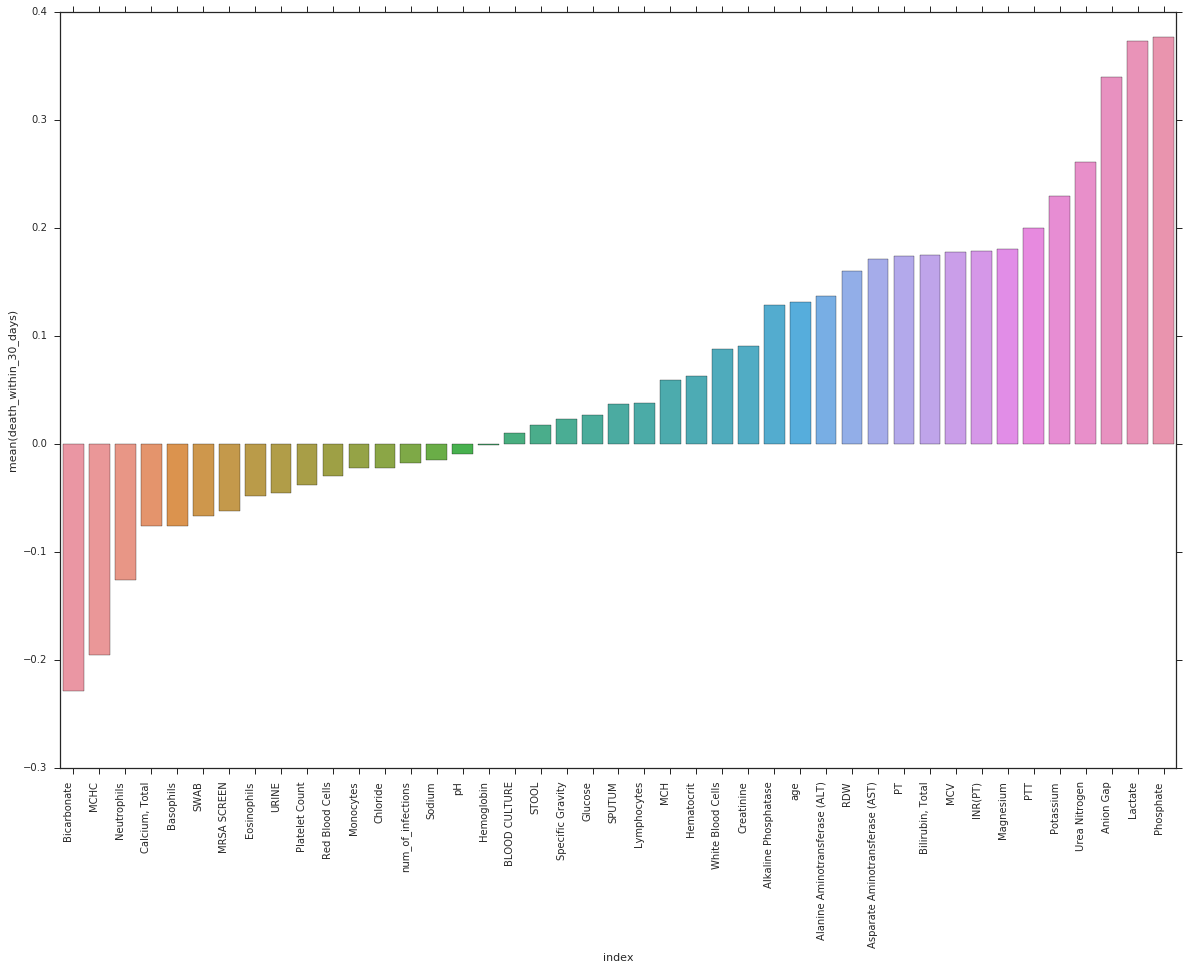

In [8]:
corr_with_target = corr['death_within_30_days']
corr_with_target = corr_with_target.reset_index()
corr_with_target.drop(corr_with_target.index[0:2],inplace=True)
corr_with_target.drop(corr_with_target.index[corr_with_target['index'] == 'death_within_30_days'],inplace=True)
corr_with_target.sort_values("death_within_30_days",inplace=True)

f, ax = plt.subplots(figsize=(20, 15))
f.autofmt_xdate(rotation=90)
sns.barplot(x="index", y="death_within_30_days", data=corr_with_target,ax=ax)

In [9]:
corr_with_target.drop(corr_with_target.index[corr_with_target['index'] == 'death_within_30_days'])

,index,death_within_30_days
7,Bicarbonate,-0.228583
20,MCHC,-0.195361
24,Neutrophils,-0.125979
9,"Calcium, Total",-0.075915
6,Basophils,-0.075805
43,SWAB,-0.066902
40,MRSA SCREEN,-0.062414
12,Eosinophils,-0.048155
44,URINE,-0.045559
28,Platelet Count,-0.038205


In [53]:
X = corr_with_target.drop(corr_with_target.index[corr_with_target['index'] == 'death_within_30_days'])
X['death_within_30_days'] = X['death_within_30_days']**2
X.sort(['death_within_30_days'],ascending=False)

,index,death_within_30_days
27,Phosphate,0.142336
17,Lactate,0.139107
4,Anion Gap,0.115525
34,Urea Nitrogen,0.068257
29,Potassium,0.052591
7,Bicarbonate,0.052250
26,PTT,0.039854
20,MCHC,0.038166
22,Magnesium,0.032697
16,INR(PT),0.031814


### Prepare the data for machine learning models

Normalize the data such that all data points have same priorities

In [10]:
sepsis_features.describe().T

,count,mean,std,min,25%,50%,75%,max
subject_id,1178,32864.662139,28120.569298,21.000000,10818.500000,23788.000000,50201.000000,99973.000000
hadm_id,1178,149390.226655,29103.492869,100262.000000,123783.750000,149538.500000,174987.000000,199880.000000
Alanine Aminotransferase (ALT),1178,94.822544,341.629940,3.000000,18.000000,33.000000,94.822544,6680.000000
Alkaline Phosphatase,1178,141.192150,135.761057,18.000000,76.000000,118.000000,141.500000,2188.000000
Anion Gap,1178,16.029977,4.039253,7.000000,13.500000,15.333333,17.666667,43.000000
Asparate Aminotransferase (AST),1178,148.710368,597.165228,8.000000,25.375000,47.000000,148.710368,11820.000000
Basophils,1178,0.187004,0.275229,0.000000,0.000000,0.100000,0.250000,3.000000
Bicarbonate,1178,21.364965,4.894832,7.000000,18.000000,21.333333,24.250000,38.000000
"Bilirubin, Total",1178,1.501629,2.856863,0.050000,0.400000,0.700000,1.501629,39.500000
"Calcium, Total",1178,7.903004,0.839075,3.800000,7.375000,7.900000,8.350000,13.100000


Since there are a lot of outliers,we are going to use Robustscaler to do the normalization

In [11]:
columns_to_normalize = sepsis_features.describe().columns.tolist()
columns_to_normalize.remove('subject_id')
columns_to_normalize.remove('hadm_id')
columns_to_normalize.remove('death_within_30_days')
columns_to_normalize

['Alanine Aminotransferase (ALT)',
 'Alkaline Phosphatase',
 'Anion Gap',
 'Asparate Aminotransferase (AST)',
 'Basophils',
 'Bicarbonate',
 'Bilirubin, Total',
 'Calcium, Total',
 'Chloride',
 'Creatinine',
 'Eosinophils',
 'Glucose',
 'Hematocrit',
 'Hemoglobin',
 'INR(PT)',
 'Lactate',
 'Lymphocytes',
 'MCH',
 'MCHC',
 'MCV',
 'Magnesium',
 'Monocytes',
 'Neutrophils',
 'PT',
 'PTT',
 'Phosphate',
 'Platelet Count',
 'Potassium',
 'RDW',
 'Red Blood Cells',
 'Sodium',
 'Specific Gravity',
 'Urea Nitrogen',
 'White Blood Cells',
 'pH',
 'age',
 'BLOOD CULTURE',
 'MRSA SCREEN',
 'SPUTUM',
 'STOOL',
 'SWAB',
 'URINE',
 'num_of_infections']

In [12]:
from sklearn.preprocessing import RobustScaler


scaler = RobustScaler()
processed_sepsis_features = sepsis_features.copy()
processed_sepsis_features[columns_to_normalize] = scaler.fit_transform(sepsis_features[columns_to_normalize])
processed_sepsis_features.describe().T

,count,mean,std,min,25%,50%,75%,max
subject_id,1178,3.286466e+04,28120.569298,21.000000,10818.500000,2.378800e+04,50201.000000,99973.000000
hadm_id,1178,1.493902e+05,29103.492869,100262.000000,123783.750000,1.495385e+05,174987.000000,199880.000000
Alanine Aminotransferase (ALT),1178,8.047448e-01,4.447001,-0.390510,-0.195255,0.000000e+00,0.804745,86.524081
Alkaline Phosphatase,1178,3.540786e-01,2.072688,-1.526718,-0.641221,0.000000e+00,0.358779,31.603053
Anion Gap,1178,1.671945e-01,0.969421,-2.000000,-0.440000,0.000000e+00,0.560000,6.640000
Asparate Aminotransferase (AST),1178,8.246651e-01,4.841800,-0.316211,-0.175335,0.000000e+00,0.824665,95.455182
Basophils,1178,3.480166e-01,1.100916,-0.400000,-0.400000,0.000000e+00,0.600000,11.600000
Bicarbonate,1178,5.061047e-03,0.783173,-2.293333,-0.533333,0.000000e+00,0.466667,2.666667
"Bilirubin, Total",1178,7.276760e-01,2.593308,-0.590035,-0.272324,0.000000e+00,0.727676,35.220571
"Calcium, Total",1178,3.080793e-03,0.860590,-4.205128,-0.538462,0.000000e+00,0.461538,5.333333


One hot encoding of all categorical features

In [13]:
processed_sepsis_features.select_dtypes(exclude=['floating','integer']).head()

,admission_type,insurance,ethnicity,gender
0,EMERGENCY,Medicare,WHITE,M
1,EMERGENCY,Medicare,ASIAN,M
2,EMERGENCY,Medicare,WHITE,M
3,EMERGENCY,Medicare,WHITE,F
4,EMERGENCY,Private,WHITE,M


In [14]:
processed_sepsis_features = pd.get_dummies(processed_sepsis_features)
print len(processed_sepsis_features.columns)
print processed_sepsis_features.columns

80
Index([u'subject_id', u'hadm_id', u'Alanine Aminotransferase (ALT)',
       u'Alkaline Phosphatase', u'Anion Gap',
       u'Asparate Aminotransferase (AST)', u'Basophils', u'Bicarbonate',
       u'Bilirubin, Total', u'Calcium, Total', u'Chloride', u'Creatinine',
       u'Eosinophils', u'Glucose', u'Hematocrit', u'Hemoglobin', u'INR(PT)',
       u'Lactate', u'Lymphocytes', u'MCH', u'MCHC', u'MCV', u'Magnesium',
       u'Monocytes', u'Neutrophils', u'PT', u'PTT', u'Phosphate',
       u'Platelet Count', u'Potassium', u'RDW', u'Red Blood Cells', u'Sodium',
       u'Specific Gravity', u'Urea Nitrogen', u'White Blood Cells', u'pH',
       u'death_within_30_days', u'age', u'BLOOD CULTURE', u'MRSA SCREEN',
       u'SPUTUM', u'STOOL', u'SWAB', u'URINE', u'num_of_infections',
       u'admission_type_EMERGENCY', u'admission_type_URGENT',
       u'insurance_Government', u'insurance_Medicaid', u'insurance_Medicare',
       u'insurance_Private', u'insurance_Self Pay', u'ethnicity_ASIAN',
       u

### Shuffle and Split Data

Now all categorical variables have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 90% of the data will be used for training and 10% for testing. We are doing 90% and 10% because our dataset is small.

In [15]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

features = processed_sepsis_features.drop(['subject_id','hadm_id','death_within_30_days'],axis=1)
targets = processed_sepsis_features['death_within_30_days']

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 942 samples.
Testing set has 236 samples.


In [16]:
y_train.shape

(942,)

In [17]:
processed_sepsis_features.head()

,subject_id,hadm_id,Alanine Aminotransferase (ALT),Alkaline Phosphatase,Anion Gap,Asparate Aminotransferase (AST),Basophils,Bicarbonate,"Bilirubin, Total","Calcium, Total",...,ethnicity_PORTUGUESE,ethnicity_UNABLE TO OBTAIN,ethnicity_UNKNOWN/NOT SPECIFIED,ethnicity_WHITE,ethnicity_WHITE - BRAZILIAN,ethnicity_WHITE - EASTERN EUROPEAN,ethnicity_WHITE - OTHER EUROPEAN,ethnicity_WHITE - RUSSIAN,gender_F,gender_M
0,21,111970,0.182238,0.748092,0.400,0.283779,-0.4,0.346667,-0.363099,-0.205128,...,0,0,0,1,0,0,0,0,0,1
1,94,183686,0.746309,-0.753181,-0.320,0.286482,3.0,0.306667,0.302582,0.179487,...,0,0,0,0,0,0,0,0,0,1
2,157,107880,-0.260340,0.000000,0.496,-0.178375,-0.4,-0.533333,-0.090775,0.041026,...,0,0,0,1,0,0,0,0,0,1
3,166,128219,0.804745,0.354079,0.880,0.824665,-0.4,0.426667,0.727676,0.003081,...,0,0,0,1,0,0,0,0,1,0
4,188,191517,1.145497,0.183206,-0.080,0.543234,-0.4,-0.693333,0.975828,-0.179487,...,0,0,0,1,0,0,0,0,0,1


## Naive Predictor

ICUs are particularly interested in predicting who is not going to survive. It would seem that using accuracy as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that does not survive as someone who does would be detrimental to *ICUs* resources, since they are looking to find patients who will likely not survice. Therefore, a model's ability to precisely predict those that will not survice is more important than the model's ability to recall those patients. We can use F-beta score as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the F$_{0.5}$ score (or F-score for simplicity).


Looking at the distribution of classes (those who will survive vs who won't survive), it's clear most patients will survive. This can greatly affect accuracy, since we could simply say "this person does survive" and generally be right, without ever looking at the data! Making such a statement would be called naive, since we have not considered any information to substantiate the claim.

In [18]:
# Calculate accuracy
accuracy = len(targets[targets == 1])/float(len(targets))

# Calculate F-score using the formula above for beta = 0.5
fscore = (1 + 0.5**2)*(accuracy*1)/(((0.5**2)*accuracy) + 1)

# Print the results 
print "Naive Predictor: [Accuracy: {:.4f}%, F-score: {:.4f}]".format(accuracy*100, fscore)

Naive Predictor: [Accuracy: 21.3922%, F-score: 0.2538]


In [19]:
# Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score,accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set,
    #       then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = clf.predict(X_test)
    predictions_train = clf.predict(X_train[:300])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
        
    # Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # Return the results
    return results

### Training the Machine Learning Models

LogisticRegression trained on 471 samples.
LogisticRegression trained on 659 samples.
LogisticRegression trained on 942 samples.
GradientBoostingClassifier trained on 471 samples.
GradientBoostingClassifier trained on 659 samples.
GradientBoostingClassifier trained on 942 samples.
AdaBoostClassifier trained on 471 samples.
AdaBoostClassifier trained on 659 samples.
AdaBoostClassifier trained on 942 samples.


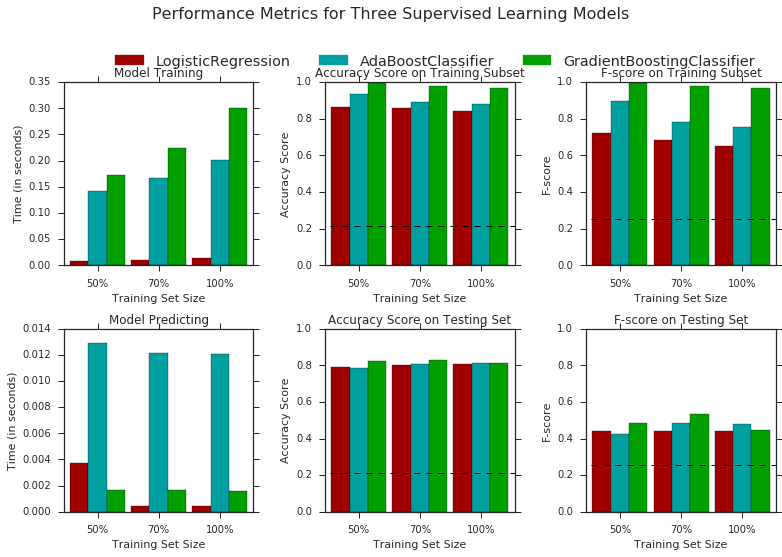

In [20]:
# Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier


my_random_state=42

# Initialize the three models
clf_A = LogisticRegression(random_state=my_random_state)
clf_B = GradientBoostingClassifier(random_state=my_random_state)
clf_C = AdaBoostClassifier(random_state=my_random_state)


# Calculate the number of samples for 50%, 70%, and 100% of the training data
samples_50 = int(0.5*len(X_train))
samples_70 = int(0.7*len(X_train))
samples_100 = len(X_train)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_50, samples_70, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

GaussianNB trained on 471 samples.
GaussianNB trained on 659 samples.
GaussianNB trained on 942 samples.
DecisionTreeClassifier trained on 471 samples.
DecisionTreeClassifier trained on 659 samples.
DecisionTreeClassifier trained on 942 samples.
KNeighborsClassifier trained on 471 samples.
KNeighborsClassifier trained on 659 samples.
KNeighborsClassifier trained on 942 samples.


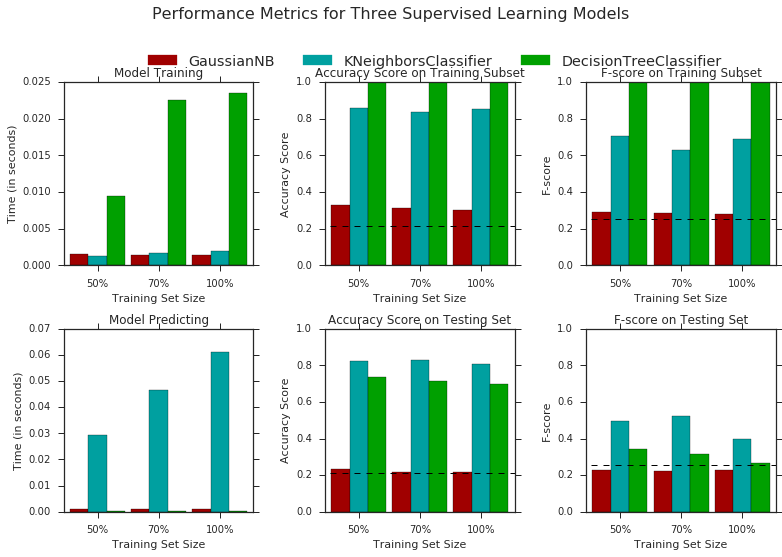

In [21]:
# Import the three supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

my_random_state=42

# Initialize the three models
clf_A = GaussianNB()
clf_B = tree.DecisionTreeClassifier(random_state=my_random_state)
clf_C = KNeighborsClassifier(n_neighbors=3)

# Calculate the number of samples for 50%, 70%, and 100% of the training data
samples_50 = int(0.5*len(X_train))
samples_70 = int(0.7*len(X_train))
samples_100 = len(X_train)

# Collect results on the learners
results1 = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results1[clf_name] = {}
    for i, samples in enumerate([samples_50, samples_70, samples_100]):
        results1[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results1, accuracy, fscore)

SGDClassifier trained on 471 samples.
SGDClassifier trained on 659 samples.
SGDClassifier trained on 942 samples.
RandomForestClassifier trained on 471 samples.
RandomForestClassifier trained on 659 samples.
RandomForestClassifier trained on 942 samples.
SVC trained on 471 samples.
SVC trained on 659 samples.
SVC trained on 942 samples.


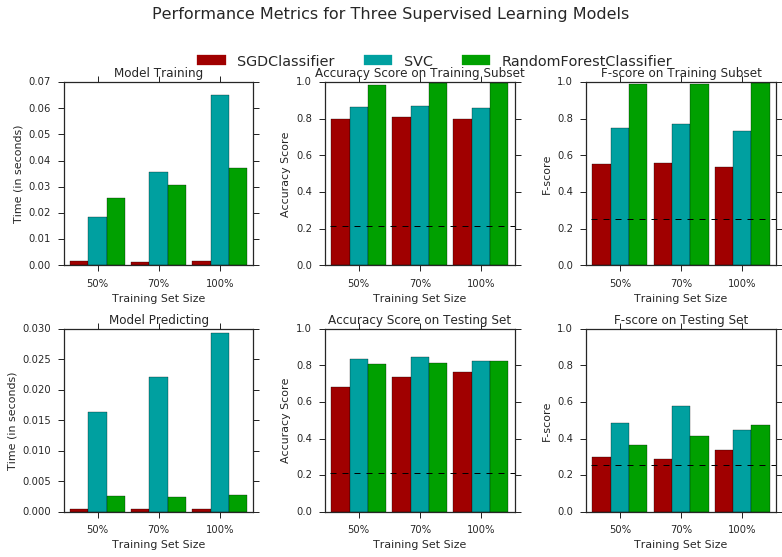

In [22]:
# Import the three supervised learning models from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

my_random_state=42

# Initialize the three models
clf_A = SGDClassifier(random_state=my_random_state)
clf_B = RandomForestClassifier(random_state=my_random_state)
clf_C = SVC(random_state=my_random_state)



# Calculate the number of samples for 50%, 70%, and 100% of the training data
samples_50 = int(0.5*len(X_train))
samples_70 = int(0.70*len(X_train))
samples_100 = len(X_train)

# Collect results on the learners
results3 = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results3[clf_name] = {}
    for i, samples in enumerate([samples_50, samples_70, samples_100]):
        results3[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results3, accuracy, fscore)

#### **Combine all results together in a single dataset**

In [23]:
# This function takes a nested dictionary and flattens it
def flatten_dict(d):
    def items():
        for key, value in d.items():
            if isinstance(value, dict):
                for subkey, subvalue in flatten_dict(value).items():
                    yield str(key) + "." + str(subkey), subvalue
            else:
                yield key, value

    return dict(items())

In [24]:
#Merge results from all 3 tests into single dictionary and then flatten the dictionary
final_results = results.copy()
final_results.update(results1)
final_results.update(results3)
final_results = flatten_dict(final_results)

#Copy results into a dataframe for easier analysis of results
final_result_df = pd.DataFrame(columns=['model_name', 'iteration#'])
for key,value in final_results.items():
    key_split = key.split('.')
    final_result_df = final_result_df.append(pd.DataFrame([[key_split[0],key_split[1],value]],columns=['model_name', 'iteration#', key_split[2]] ))

final_result_df.set_index(['model_name'], inplace=True)
final_result_df.reset_index(inplace=True)

final_result_df = final_result_df.groupby(['model_name','iteration#']).mean()
final_result_df.reset_index(inplace=True)
final_result_df.sort_values(by=['f_test'],ascending=False)

,model_name,iteration#,acc_test,acc_train,f_test,f_train,pred_time,train_time
25,SVC,1,0.847458,0.870000,0.578512,0.769231,0.022006,0.035493
10,GradientBoostingClassifier,1,0.830508,0.976667,0.532544,0.976821,0.001640,0.223134
13,KNeighborsClassifier,1,0.830508,0.836667,0.522876,0.630631,0.046396,0.001623
12,KNeighborsClassifier,0,0.822034,0.860000,0.496894,0.707965,0.029334,0.001204
1,AdaBoostClassifier,1,0.805085,0.890000,0.483871,0.782443,0.012120,0.166675
24,SVC,0,0.834746,0.863333,0.483871,0.747126,0.016293,0.018331
9,GradientBoostingClassifier,0,0.822034,0.996667,0.482759,0.996933,0.001674,0.172911
2,AdaBoostClassifier,2,0.813559,0.880000,0.480226,0.755814,0.012079,0.201265
20,RandomForestClassifier,2,0.822034,0.993333,0.474453,0.993789,0.002769,0.037162
11,GradientBoostingClassifier,2,0.813559,0.970000,0.448276,0.969388,0.001610,0.300604


In [25]:
final_result_df[final_result_df['iteration#'] == '2'].sort_values(by=['acc_test'],ascending=False)

,model_name,iteration#,acc_test,acc_train,f_test,f_train,pred_time,train_time
26,SVC,2,0.826271,0.860000,0.445545,0.735294,0.029221,0.065048
20,RandomForestClassifier,2,0.822034,0.993333,0.474453,0.993789,0.002769,0.037162
2,AdaBoostClassifier,2,0.813559,0.880000,0.480226,0.755814,0.012079,0.201265
11,GradientBoostingClassifier,2,0.813559,0.970000,0.448276,0.969388,0.001610,0.300604
14,KNeighborsClassifier,2,0.809322,0.853333,0.400000,0.688073,0.061245,0.001892
17,LogisticRegression,2,0.805085,0.843333,0.443787,0.651261,0.000425,0.014289
23,SGDClassifier,2,0.762712,0.800000,0.336788,0.536913,0.000438,0.001667
5,DecisionTreeClassifier,2,0.699153,1.000000,0.268199,1.000000,0.000446,0.023490
8,GaussianNB,2,0.216102,0.300000,0.229885,0.282051,0.000966,0.001340


In [26]:
final_result_df[final_result_df['iteration#'] == '2'].sort_values(by=['f_test'],ascending=False)

,model_name,iteration#,acc_test,acc_train,f_test,f_train,pred_time,train_time
2,AdaBoostClassifier,2,0.813559,0.880000,0.480226,0.755814,0.012079,0.201265
20,RandomForestClassifier,2,0.822034,0.993333,0.474453,0.993789,0.002769,0.037162
11,GradientBoostingClassifier,2,0.813559,0.970000,0.448276,0.969388,0.001610,0.300604
26,SVC,2,0.826271,0.860000,0.445545,0.735294,0.029221,0.065048
17,LogisticRegression,2,0.805085,0.843333,0.443787,0.651261,0.000425,0.014289
14,KNeighborsClassifier,2,0.809322,0.853333,0.400000,0.688073,0.061245,0.001892
23,SGDClassifier,2,0.762712,0.800000,0.336788,0.536913,0.000438,0.001667
5,DecisionTreeClassifier,2,0.699153,1.000000,0.268199,1.000000,0.000446,0.023490
8,GaussianNB,2,0.216102,0.300000,0.229885,0.282051,0.000966,0.001340


#### *Selected Algorithim for optimization*

Based on the results above, it's hard to single out one algorithim that gives the best results. We will optimize the results for 3 different algorithims to figure out which works the best. Selected algorithims are -

1. GradientBoosting Classifier

2. AdaBoostClassifier with RandomForest Classifier

3. SVC

#### Figure out Feature importance

Goal here is to figure out which features were most important to predict the outcome.

GradientBoostingClassifier trained on 942 samples.
{'pred_time': 0.0017790794372558594, 'f_test': 0.44827586206896552, 'train_time': 0.30747103691101074, 'acc_train': 0.96999999999999997, 'acc_test': 0.81355932203389836, 'f_train': 0.96938775510204078}


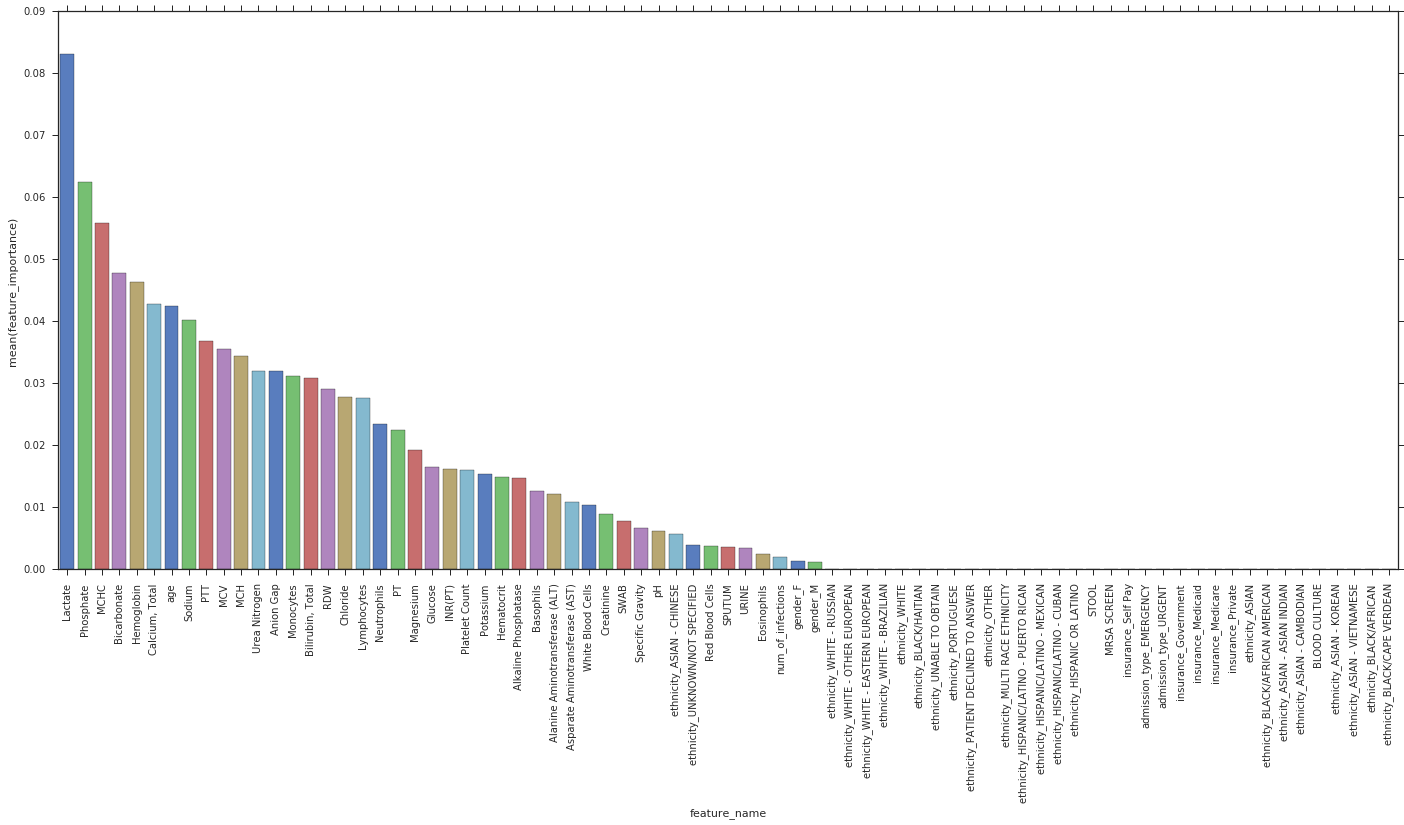

In [27]:
'''
Feature importance using GradientBoostingClassifier algorithim.

'''
my_random_state=42

# Initialize the model

clf = GradientBoostingClassifier(random_state=my_random_state)

# Calculate the number of samples of the training data
sample_size = len(X_train)

GB_result = train_predict(clf, samples, X_train, y_train, X_test, y_test)

print GB_result

feature_importance_df = pd.DataFrame({'feature_name': features.columns, 'feature_importance': clf.feature_importances_})
feature_importance_df.sort_values(['feature_importance'],ascending=False,inplace=True)

fig,ax1 = plt.subplots(1, 1,figsize=(24,10),gridspec_kw={'hspace':0.4})

g = sns.barplot(x="feature_name",y="feature_importance",data=feature_importance_df,ax=ax1,palette="muted")
for item in g.get_xticklabels():
    item.set_rotation(90)

AdaBoostClassifier trained on 942 samples.
{'pred_time': 0.012035131454467773, 'f_test': 0.48022598870056493, 'train_time': 0.20726394653320312, 'acc_train': 0.88, 'acc_test': 0.81355932203389836, 'f_train': 0.7558139534883721}


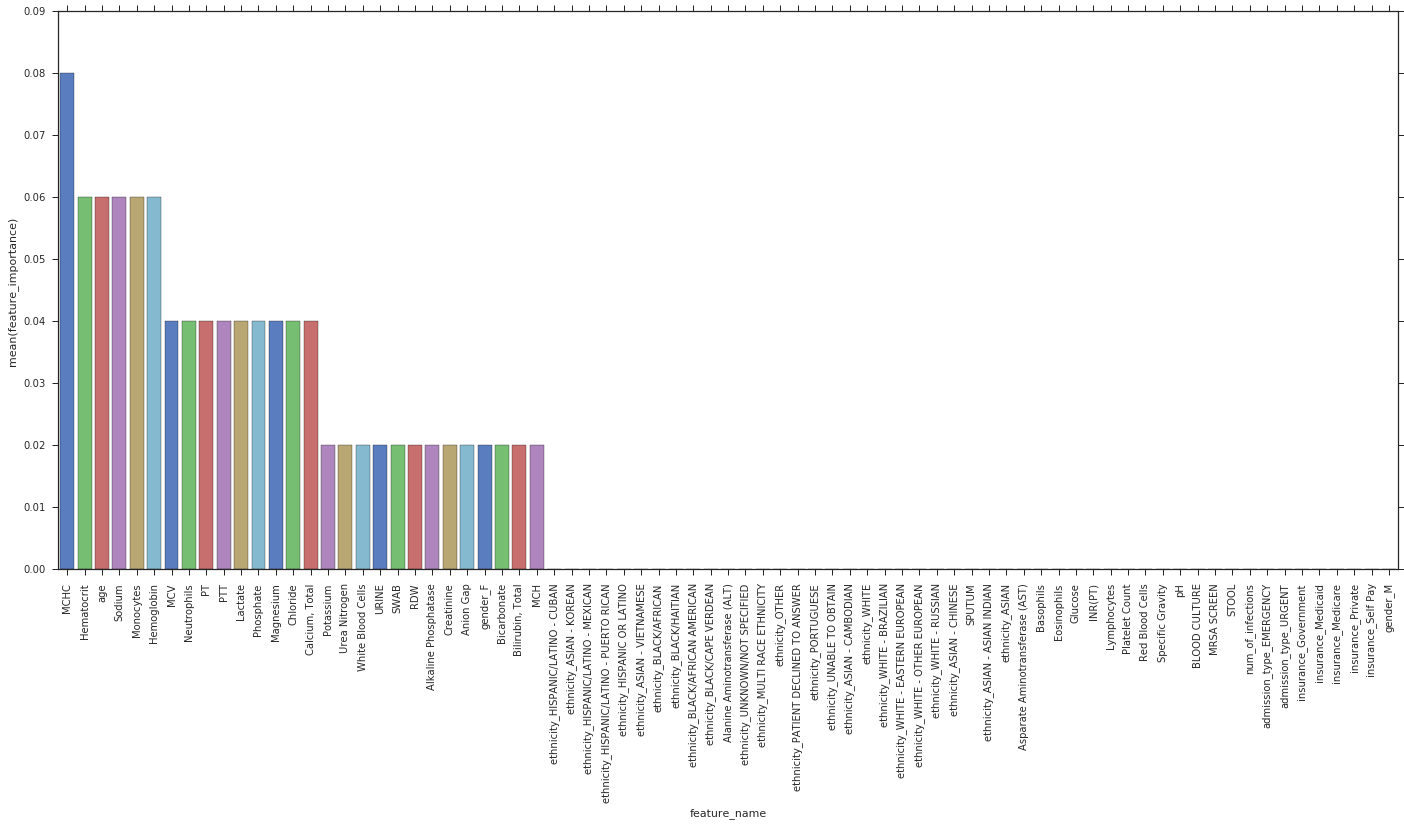

In [28]:
'''
Feature importance using AdaBoostClassifier

'''
my_random_state=42

# Initialize the model

clf = AdaBoostClassifier(random_state=my_random_state)

# Calculate the number of samples of the training data
sample_size = len(X_train)

Ada_result = train_predict(clf, samples, X_train, y_train, X_test, y_test)

print Ada_result

feature_importance_df = pd.DataFrame({'feature_name': features.columns, 'feature_importance': clf.feature_importances_})
feature_importance_df.sort_values(['feature_importance'],ascending=False,inplace=True)

fig,ax1 = plt.subplots(1, 1,figsize=(24,10),gridspec_kw={'hspace':0.4})

g = sns.barplot(x="feature_name",y="feature_importance",data=feature_importance_df,ax=ax1,palette="muted")
for item in g.get_xticklabels():
    item.set_rotation(90)

SVC trained on 942 samples.
{'pred_time': 0.015388011932373047, 'f_test': 0.46979865771812079, 'train_time': 1.6903979778289795, 'acc_train': 0.84666666666666668, 'acc_test': 0.81779661016949157, 'f_train': 0.66831683168316824}


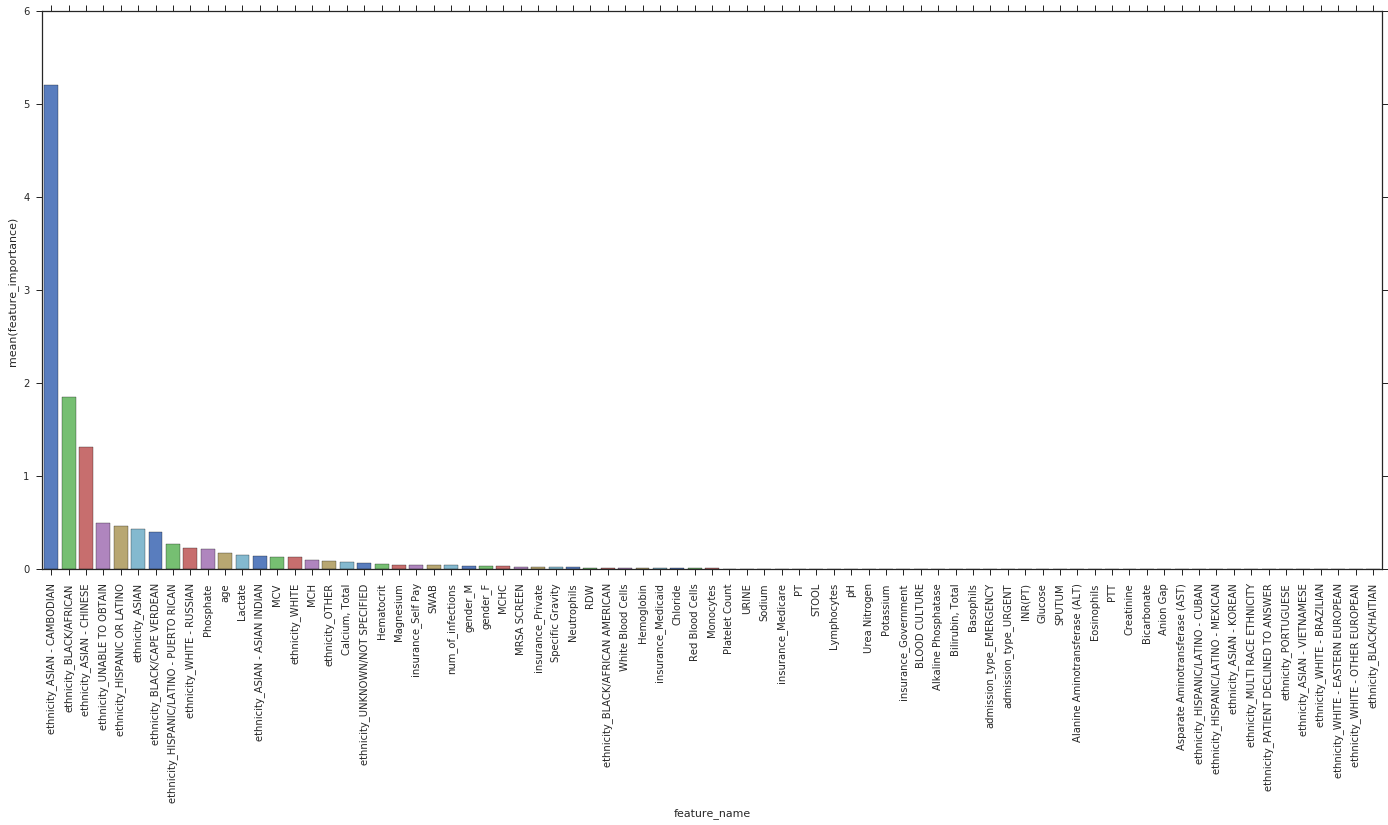

In [46]:
'''
Feature importance using SVC

'''
my_random_state=42

# Initialize the model

clf = SVC(random_state=my_random_state,kernel='linear',C=10,gamma=0.005)

# Calculate the number of samples of the training data
sample_size = len(X_train)

SVC_result = train_predict(clf, samples, X_train, y_train, X_test, y_test)

print SVC_result


feature_importance_df = pd.DataFrame({'feature_name': features.columns, 'feature_importance': clf.coef_[0]**2})
feature_importance_df.sort_values(['feature_importance'],ascending=False,inplace=True)

fig,ax1 = plt.subplots(1, 1,figsize=(24,10),gridspec_kw={'hspace':0.4})

g = sns.barplot(x="feature_name",y="feature_importance",data=feature_importance_df,ax=ax1,palette="muted")
for item in g.get_xticklabels():
    item.set_rotation(90)

In [36]:
SVC_result['C'] = 1e3
SVC_result['gamma'] = 0.05
SVC_result['kernel'] = 'linear'

df_svc_result = pd.DataFrame([SVC_result])
df_svc_result.drop(0,inplace=True)
df_svc_result.append(pd.DataFrame([SVC_result]))
df_svc_result

,C,acc_test,acc_train,f_test,f_train,gamma,kernel,pred_time,train_time
0,1000,0.79661,1,0.454545,1,0.05,linear,0.030896,0.115025


**Optimization of SVC classifier algorithim**

In [37]:
'''
Feature optimization using SVC

'''
my_random_state=42

# Initialize the model

C = [1, 1e1, 1e2]
GAMMA = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1,'auto']
KERNEL = ['linear', 'rbf']

for c in C:
    for gamma in GAMMA:
        for kernel in KERNEL:
            clf = SVC(random_state=my_random_state,kernel=kernel,C=c,gamma=gamma)
            # Calculate the number of samples of the training data
            sample_size = len(X_train)
            SVC_result = train_predict(clf, samples, X_train, y_train, X_test, y_test)
            SVC_result['C'] = c
            SVC_result['gamma'] = gamma
            SVC_result['kernel'] = kernel
            print SVC_result
            df_svc_result = df_svc_result.append(pd.DataFrame([SVC_result]))

SVC trained on 942 samples.
{'kernel': 'linear', 'pred_time': 0.014316082000732422, 'f_test': 0.46979865771812079, 'train_time': 0.19449806213378906, 'acc_train': 0.85333333333333339, 'C': 1, 'acc_test': 0.81779661016949157, 'f_train': 0.69306930693069302, 'gamma': 0.0001}
SVC trained on 942 samples.
{'kernel': 'rbf', 'pred_time': 0.02558612823486328, 'f_test': 0.094339622641509441, 'train_time': 0.053900957107543945, 'acc_train': 0.78333333333333333, 'C': 1, 'acc_test': 0.80932203389830504, 'f_train': 0.071428571428571438, 'gamma': 0.0001}
SVC trained on 942 samples.
{'kernel': 'linear', 'pred_time': 0.014462947845458984, 'f_test': 0.46979865771812079, 'train_time': 0.19142889976501465, 'acc_train': 0.85333333333333339, 'C': 1, 'acc_test': 0.81779661016949157, 'f_train': 0.69306930693069302, 'gamma': 0.0005}
SVC trained on 942 samples.
{'kernel': 'rbf', 'pred_time': 0.024744033813476562, 'f_test': 0.30769230769230765, 'train_time': 0.05433297157287598, 'acc_train': 0.80000000000000004

In [42]:
df_svc_result.sort_values('f_test',ascending=False).head(10)

,C,acc_test,acc_train,f_test,f_train,gamma,kernel,pred_time,train_time
0,100,0.847458,0.836667,0.571429,0.632911,0.0001,rbf,0.023855,0.058231
0,10,0.843220,0.906667,0.570470,0.862832,0.005,rbf,0.027074,0.066746
0,100,0.843220,0.876667,0.567376,0.789474,0.001,rbf,0.023533,0.072750
0,100,0.843220,0.866667,0.560000,0.758427,0.0005,rbf,0.022319,0.061838
0,10,0.843220,0.840000,0.550459,0.650685,0.001,rbf,0.022534,0.054920
0,10,0.822034,0.966667,0.508475,0.965517,auto,rbf,0.030553,0.077494
0,100,0.809322,0.976667,0.502183,0.976821,0.005,rbf,0.027758,0.106575
0,10,0.817797,0.933333,0.497238,0.920000,0.01,rbf,0.028832,0.073377
0,10,0.834746,0.833333,0.483871,0.615942,0.0005,rbf,0.023060,0.055655
0,10,0.817797,0.846667,0.469799,0.668317,0.005,linear,0.015390,1.717552


**Optimization of AdaBoost boosting with Random Forest classifier**

In [30]:
#Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import fbeta_score,accuracy_score,make_scorer

# Create the parameters list you wish to tune
# Multiple parameters were used for optimization. All the parameters that were used for optimization are listed here.
parameters = {'base_estimator__max_depth':[1,3,5,10,20],"base_estimator__criterion" : ["gini", "entropy"],
          'base_estimator__max_features':[2,10,15,20,30,40,50],
             "n_estimators": [1,2,5,10,20,30,80],"learning_rate":[0.01,0.1,0.5,1.0] }


#Initialize the classifier
clf = AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=my_random_state))

# Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, param_grid=parameters,scoring=scorer,n_jobs=8)

# Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))

Unoptimized model
------
Accuracy score on testing data: 0.8263
F-score on testing data: 0.4587

Optimized Model
------
Final accuracy score on the testing data: 0.8347
Final F-score on the testing data: 0.5369


In [31]:
best_clf

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=1, max_features=50, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          learning_rate=0.5, n_estimators=30, random_state=None)

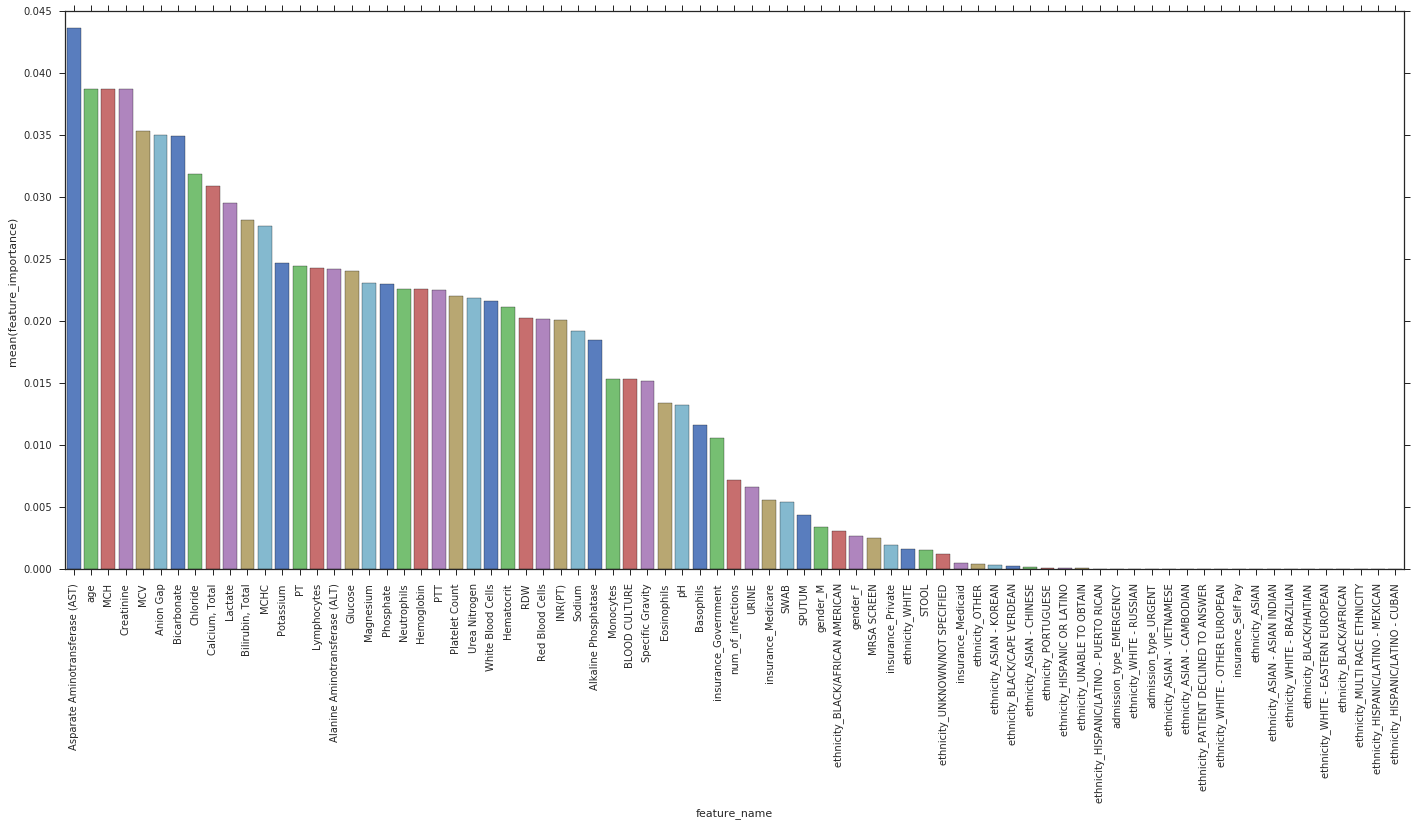

In [32]:
feature_importance_df = pd.DataFrame({'feature_name': features.columns, 'feature_importance': clf.feature_importances_})
feature_importance_df.sort_values(['feature_importance'],ascending=False,inplace=True)

fig,ax1 = plt.subplots(1, 1,figsize=(24,10),gridspec_kw={'hspace':0.4})

g = sns.barplot(x="feature_name",y="feature_importance",data=feature_importance_df,ax=ax1,palette="muted")
for item in g.get_xticklabels():
    item.set_rotation(90)

**Optimizaing for Gradient Boosting Classifier**

In [36]:
#Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import fbeta_score,accuracy_score,make_scorer

#Initialize the classifier
clf = GradientBoostingClassifier(random_state=my_random_state)

# Create the parameters list you wish to tune
# Multiple parameters were used for optimization. All the parameters that were used for optimization are listed here.
parameters = {'max_depth':[None,3,5,8,16],'min_samples_split':[2,4],'max_features':[None,5,10,15,20,30],'min_samples_leaf':[1,5,11,50],'n_estimators':[50,100],'learning_rate':[0.01,0.05,0.1] }

# Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, param_grid=parameters,scoring=scorer,n_jobs=8)

# Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))

Unoptimized model
------
Accuracy score on testing data: 0.8136
F-score on testing data: 0.4483

Optimized Model
------
Final accuracy score on the testing data: 0.8347
Final F-score on the testing data: 0.4950


In [39]:
best_clf

GradientBoostingClassifier(init=None, learning_rate=0.05, loss='deviance',
              max_depth=16, max_features=5, max_leaf_nodes=None,
              min_samples_leaf=11, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

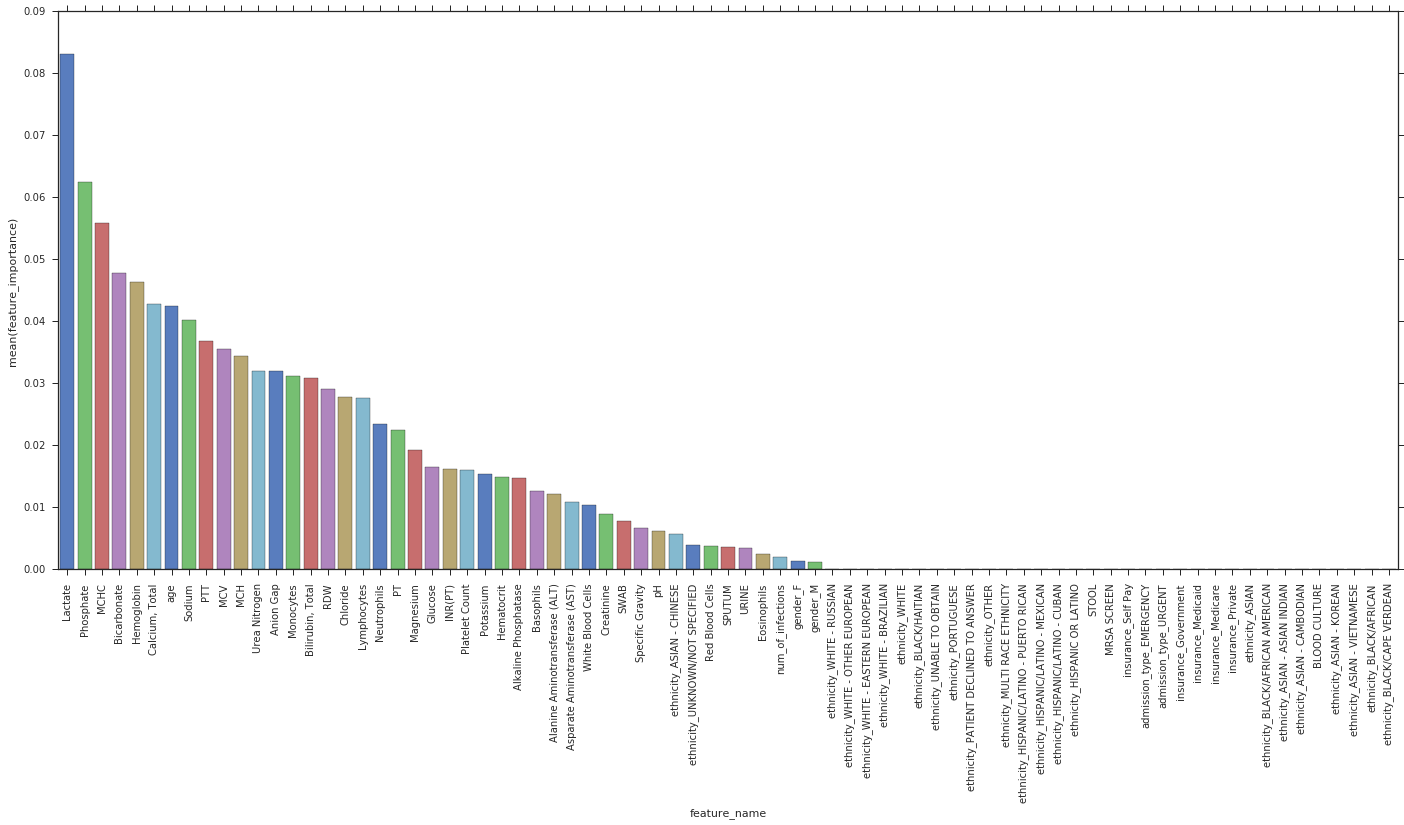

In [38]:
feature_importance_df = pd.DataFrame({'feature_name': features.columns, 'feature_importance': clf.feature_importances_})
feature_importance_df.sort_values(['feature_importance'],ascending=False,inplace=True)

fig,ax1 = plt.subplots(1, 1,figsize=(24,10),gridspec_kw={'hspace':0.4})

g = sns.barplot(x="feature_name",y="feature_importance",data=feature_importance_df,ax=ax1,palette="muted")
for item in g.get_xticklabels():
    item.set_rotation(90)

#### Implementation of neural network

Building a simple neural network to see what kind of results Neural Network will provide.

In [67]:
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(942, 77)
(236, 77)
(942,)
(236,)


Converting input data into arrays to feed into neural network

In [50]:
train_x_array = X_train.values.astype('float32')
print train_x_array.shape
test_x_array = X_test.values.astype('float32')
print test_x_array.shape
train = y_train.reset_index()
train.drop("index",axis=1,inplace=True)
print train.shape
test = y_test.reset_index()
test.drop("index",axis=1,inplace=True)
print test.shape

(942, 77)
(236, 77)
(942, 1)
(236, 1)


In [81]:
from sklearn.metrics import accuracy_score
import tensorflow as tf

Let’s set a seed value, so that we can control our models randomness

In [82]:
seed = 128
rng = np.random.RandomState(seed)

Defining some helper function to use later in the programs

In [107]:
def dense_to_one_hot(labels_dense, num_classes=2):
    """Convert class labels from scalars to one-hot vectors"""
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    
    return labels_one_hot

def preproc(unclean_batch_x):
    """Convert values to range 0-1"""
    temp_batch = unclean_batch_x / unclean_batch_x.max()
    
    return temp_batch

def batch_creator(batch_size, dataset_length, dataset_name):
    """Create batch with random samples and return appropriate format"""
    batch_mask = rng.choice(dataset_length, batch_size)
    
    #batch_x = eval(dataset_name + '_x_array')[[batch_mask]].reshape(-1, input_num_units)
    batch_x = eval(dataset_name + '_x_array')[[batch_mask]]
    batch_x = preproc(batch_x)
    
    if dataset_name == 'train':
        batch_y = eval(dataset_name).ix[batch_mask, 'death_within_30_days'].values
        batch_y = dense_to_one_hot(batch_y)
        
    return batch_x, batch_y

In [171]:
### set all variables

# number of neurons in each layer
input_num_units = train_x_array.shape[1]
hidden_num_units = 20
output_num_units = 2

# define placeholders
x = tf.placeholder(tf.float32, [None, input_num_units])
y = tf.placeholder(tf.float32, [None, output_num_units])

# set remaining variables
epochs = 5
batch_size = 128
learning_rate = 0.01

### define weights and biases of the neural network (refer this article if you don't understand the terminologies)

weights = {
    'hidden': tf.Variable(tf.random_normal([input_num_units, hidden_num_units], seed=seed)),
    'output': tf.Variable(tf.random_normal([hidden_num_units, output_num_units], seed=seed))
}

biases = {
    'hidden': tf.Variable(tf.random_normal([hidden_num_units], seed=seed)),
    'output': tf.Variable(tf.random_normal([output_num_units], seed=seed))
}

#Now create our neural networks computational graph

hidden_layer = tf.add(tf.matmul(x, weights['hidden']), biases['hidden'])
#hidden_layer = tf.nn.relu(hidden_layer)

output_layer = tf.matmul(hidden_layer, weights['output']) + biases['output']

#cost function of our neural network
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(output_layer, y))

#Setting up the optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


In [174]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    # create initialized variables
    sess.run(init)
    
    ### for each epoch, do:
    ###   for each batch, do:
    ###     create pre-processed batch
    ###     run optimizer by feeding batch
    ###     find cost and reiterate to minimize
    
    for epoch in range(epochs):
        avg_cost = 0
        total_batch = int(train_x_array.shape[0]/batch_size)
        for i in range(total_batch):
            batch_x, batch_y = batch_creator(batch_size, train_x_array.shape[0], 'train')
            _, c = sess.run([optimizer, cost], feed_dict = {x: batch_x, y: batch_y})
            
            avg_cost += c / total_batch
            
        print "Epoch:", (epoch+1), "cost =", "{:.5f}".format(avg_cost)
    
    print "\nTraining complete!\n"
    
    
    # find predictions on test set
    #pred_temp = tf.equal(tf.argmax(output_layer, 1), tf.argmax(y, 1))
    #accuracy = tf.reduce_mean(tf.cast(pred_temp, "float"))
    #print "Training Accuracy:", accuracy.eval({x: train_x_array.reshape(-1, input_num_units), y: dense_to_one_hot(train.values)})
    
    predict = tf.argmax(output_layer, 1)
    pred = predict.eval({x: test_x_array.reshape(-1, input_num_units)})
    
    # Compute accuracy on test set
    nn_accuracy = accuracy_score(y_test, pred)
    print "\nAccuracy of Neural network: " + "{0:.0f}%".format(nn_accuracy * 100)
    
    # Compute F-score on the the test set
    nn_fscore = fbeta_score(y_test, pred, beta=0.5)
    print "\nF-score is: " + str(nn_fscore)

Epoch: 1 cost = 1.99268
Epoch: 2 cost = 0.70908
Epoch: 3 cost = 0.83751
Epoch: 4 cost = 0.70111
Epoch: 5 cost = 0.59648

Training complete!


Accuracy of Neural network: 81%

F-score is: 0.502183406114
